# ESG Score Prediction

## Notebook Outline :

1. Introduction (ESG Score, Calculation method, Factors - Summary based on the TR pdf)
2. Data Explanation (Features - what they are)
3. Data Processing - Outlier Detection, Feature Transformation 
4. EDA - Basic Insights
6. Feature Selection/Importance
5. Data Modelling

TODO :
1. Figure out Return and MC data values 
2. P/E Daily time series ration - what does this column mean? - Karthik
3. Read about KNN Imputation 
4. Null values and outlier 

'Total Current Assets', 'Total Current Liabilities', 'Total Debt', 'Total Assets, Reported' - Dev

'P/E (Daily Time Series Ratio)','CO2 Emissions','Total Revenue', 'Total Equity' - Karthik

 'Net Income - Actual','Revenue Per Share','Company Market Capitalization', 'PPE Total', - Sush

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df_firm = pd.read_csv("Firm_Data.csv")

In [82]:
df_firm.head(20)

,RIC,Date,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,Total CO2 Equivalent Emissions To Revenues USD in million,ESG Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Company Market Capitalization,"Property Plant And Equipment, Total - Gross",P/E (Daily Time Series Ratio)
0,BVIC.L,31/12/2009,434.373405,483.824655,718.957376,1361.504594,107.309409,7.068281,1561.383359,-3.988004,NaN,51.267135,45.539754,59.077651,53.535053,1430.561330,817.381317,19.299905
1,BVIC.L,31/12/2010,579.778906,580.095207,901.298414,1655.358922,139.656087,8.006665,1800.699024,-48.552134,NaN,50.550242,57.622888,31.890959,55.261467,1772.376566,889.120843,16.927900
2,BVIC.L,31/12/2011,598.968478,607.694345,893.154869,1660.096296,122.255528,7.912984,2010.689188,35.059289,NaN,46.732870,57.397993,28.924942,45.229496,1205.126197,836.280911,13.534436
3,BVIC.L,31/12/2012,615.523874,601.137943,907.121844,1658.099764,100.765756,7.914423,2030.840850,59.968319,NaN,57.941343,70.633040,37.216902,55.762859,1603.272359,872.046035,18.363571
4,BVIC.L,31/12/2013,748.229068,814.064189,895.874010,1714.940377,133.919162,8.716901,2133.025672,65.996482,31.296503,49.513243,52.778937,33.146107,58.148148,2819.919676,907.653333,27.421399
5,BVIC.L,31/12/2014,828.662865,705.524961,916.711341,1790.210699,157.742654,8.824210,2183.992072,134.996832,27.779129,56.486561,51.956458,53.173608,66.189318,2600.057241,923.534285,18.651145
6,BVIC.L,31/12/2015,958.070197,697.413165,877.611125,1972.158125,174.101133,7.841383,1973.676221,321.532669,30.711131,71.533697,70.562749,61.699281,81.216931,2810.455180,901.445227,17.698577
7,BVIC.L,31/12/2016,937.577039,1011.275318,1014.648830,2120.642005,161.302423,7.055922,1857.118761,364.598876,37.880026,54.877377,45.421212,66.527985,59.659234,1839.323904,1153.222353,13.027894
8,BVIC.L,31/12/2017,766.252729,827.606532,900.748838,2160.779113,186.478624,7.250479,1916.301625,454.527187,35.135417,68.473164,70.109455,56.919381,75.593852,2906.107284,1256.815229,19.312796
9,BVIC.L,31/12/2018,848.120066,910.393705,1001.980250,2293.441726,189.832937,7.380873,1958.883765,491.544855,31.206958,63.609177,66.475517,40.414673,78.545530,2701.676442,1314.911801,18.140770


In [83]:
df_firm.shape

(24479, 18)

In [84]:
df_firm.columns

Index(['RIC', 'Date', 'Total Current Assets', 'Total Current Liabilities',
       'Total Debt', 'Total Assets, Reported', 'Net Income - Actual',
       'Revenue Per Share', 'Total Revenue', 'Total Equity',
       'Total CO2 Equivalent Emissions To Revenues USD in million',
       'ESG Score', 'Social Pillar Score', 'Governance Pillar Score',
       'Environmental Pillar Score', 'Company Market Capitalization',
       'Property Plant And Equipment, Total - Gross',
       'P/E (Daily Time Series Ratio)'],
      dtype='object')

In [85]:
# Lets rename some columns
df_firm.rename(columns={"Total CO2 Equivalent Emissions To Revenues USD in million": "CO2 Emissions", "Property Plant And Equipment, Total - Gross": "PPE Total"},inplace=True)

In [86]:
df_ID = pd.read_csv("ID_Data.csv")
df_ID.head()

,Unnamed: 0,RIC,ISIN,Name,Sector,Country
0,0,INTU.O,US4612021034,Intuit Inc,Technology,USA
1,1,HL,US4227041062,Hecla Mining Co,Basic Materials,USA
2,2,GILG.DE,DE0005878003,DMG Mori AG,Industrials,Germany
3,3,APH,US0320951017,Amphenol Corp,Technology,USA
4,4,SGH.O,KYG8232Y1017,Smart Global Holdings Inc,Technology,USA


In [87]:
df_return = pd.read_csv("Return_Data.csv")
df_return.head(20)

,Unnamed: 0,Date,INTU.O,HL,GILG.DE,APH,SGH.O,PMAG.S,RTX,SOLARb.CO,...,XYL,SCHN.PA,PRGO.K,TRELb.ST,SRG.MI,LOG.MC,GEO.MI,NRG,MYTr.AT,TEMN.S
0,0,2000-01-31,0.625652,-1.200000e+01,11.671470,1.971831,0.0,0.0,-18.557692,0.000000e+00,...,0.0,-6.991661e+00,7.421875,-1.045752e+01,0.0,0.0,0.0,0.0,-23.040752,0.000000
1,1,2000-02-29,-12.953368,4.545455e+00,-2.580645,17.771639,0.0,0.0,-3.408844,-2.777778e+00,...,0.0,-7.586207e+00,-14.545455,-1.021898e+01,0.0,0.0,0.0,0.0,-18.533605,0.000000
2,2,2000-03-31,3.571429,-4.347826e+00,3.973510,27.912432,0.0,0.0,24.049080,3.428571e+00,...,0.0,-4.477612e-01,3.404255,-8.130081e-01,0.0,0.0,0.0,0.0,1.125000,0.000000
3,3,2000-04-30,-33.908046,-9.090909e+00,5.732484,24.694377,0.0,0.0,-1.582591,2.287293e+00,...,0.0,7.946027e+00,-25.102881,3.516658e+00,0.0,0.0,0.0,0.0,-20.519159,0.000000
4,4,2000-05-31,0.869565,-1.500000e+01,11.862429,-28.235294,0.0,0.0,-2.515897,2.040297e+00,...,0.0,-8.333333e-01,5.494505,-4.023120e-10,0.0,0.0,0.0,0.0,19.284603,0.000000
5,5,2000-06-30,14.137931,5.882353e+00,2.272727,44.450142,0.0,0.0,-2.585315,-8.816245e+01,...,0.0,4.184199e+00,5.208333,2.500000e+00,0.0,0.0,0.0,0.0,-10.166881,0.000000
6,6,2000-07-31,-17.824773,-2.222222e+01,5.000000,-20.652562,0.0,0.0,-0.849257,6.766103e+02,...,0.0,8.904110e-01,6.930693,4.065041e+00,0.0,0.0,0.0,0.0,-6.389302,0.000000
7,7,2000-08-31,76.102941,-4.664490e-10,6.349206,22.050060,0.0,0.0,7.293073,5.882353e+00,...,0.0,1.269518e+01,9.722222,7.812500e-01,0.0,0.0,0.0,0.0,-11.428571,0.000000
8,8,2000-09-30,-4.801670,-1.428571e+01,-2.487562,-11.035156,0.0,0.0,11.111111,-2.972222e+00,...,0.0,-1.397590e+01,-7.594937,-5.426357e+00,0.0,0.0,0.0,0.0,-1.881720,0.000000
9,9,2000-10-31,7.785088,-2.500000e+01,-11.020408,12.843030,0.0,0.0,0.630631,3.063269e+00,...,0.0,7.492997e+00,-3.196347,-8.196721e+00,0.0,0.0,0.0,0.0,-26.118721,0.000000


### Data Exploration

In [88]:
df_firm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24479 entries, 0 to 24478
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   RIC                            24479 non-null  object 
 1   Date                           24479 non-null  object 
 2   Total Current Assets           22689 non-null  float64
 3   Total Current Liabilities      22681 non-null  float64
 4   Total Debt                     23628 non-null  float64
 5   Total Assets, Reported         23663 non-null  float64
 6   Net Income - Actual            21343 non-null  float64
 7   Revenue Per Share              23617 non-null  float64
 8   Total Revenue                  23718 non-null  float64
 9   Total Equity                   23640 non-null  float64
 10  CO2 Emissions                  14408 non-null  float64
 11  ESG Score                      17762 non-null  float64
 12  Social Pillar Score            17761 non-null 

#### Share of Null Values in the data

In [89]:
df_firm.isnull().sum()/len(df_firm) *100

RIC                               0.000000
Date                              0.000000
Total Current Assets              7.312390
Total Current Liabilities         7.345071
Total Debt                        3.476449
Total Assets, Reported            3.333470
Net Income - Actual              12.810981
Revenue Per Share                 3.521386
Total Revenue                     3.108787
Total Equity                      3.427428
CO2 Emissions                    41.141386
ESG Score                        27.439846
Social Pillar Score              27.443932
Governance Pillar Score          27.439846
Environmental Pillar Score       27.443932
Company Market Capitalization     7.516647
PPE Total                         9.653172
P/E (Daily Time Series Ratio)    21.933086
dtype: float64

#### Outliers 

In [90]:
df_firm.describe([0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.98,0.99])

,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,CO2 Emissions,ESG Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Company Market Capitalization,PPE Total,P/E (Daily Time Series Ratio)
count,22689.000000,22681.000000,23628.000000,23663.000000,21343.000000,23617.000000,23718.000000,23640.000000,14408.000000,17762.000000,17761.000000,17762.000000,17761.000000,2.263900e+04,22116.000000,19110.000000
mean,4692.829418,3723.691291,4483.228909,15086.476701,879.905168,105.508067,10246.240602,5148.146175,385.527429,55.700185,57.786323,55.827876,52.231873,2.142561e+04,8703.691339,39.547117
std,13508.717536,10296.088849,13373.143702,37604.863640,2715.017134,2747.808830,27863.720433,13830.073805,1362.586319,18.854484,22.045962,21.617581,25.520278,2.468674e+05,27570.799105,236.995909
min,0.008869,0.000415,0.000000,0.008869,-9703.255825,-33.626790,-188.078000,-85560.000000,0.000000,1.019613,0.263458,0.249062,0.000000,4.115218e-01,0.000000,0.124464
10%,134.468447,87.445042,23.882996,432.845198,8.700617,1.890277,261.294152,133.523973,5.699868,29.004454,26.558481,25.509863,14.708211,4.156814e+02,73.584000,8.519075
20%,283.336908,185.185185,127.873195,947.510106,36.086495,4.333428,568.553446,316.311897,11.665289,38.284824,36.703625,34.998173,28.427191,8.122769e+02,241.403054,11.633397
40%,769.485162,509.801821,574.200822,2486.306053,112.162954,11.604785,1594.758919,881.293103,29.907056,51.554523,52.433124,50.458138,46.820513,2.156526e+03,890.222000,16.739378
50%,1177.409528,815.154946,977.564496,3807.254064,179.474856,16.741294,2457.730056,1347.365468,43.776762,57.218624,59.358661,57.483966,54.598596,3.370318e+03,1493.990867,19.398117
60%,1814.817905,1298.030311,1585.258199,5815.820000,288.314600,23.286913,3758.075856,1984.703400,67.426194,62.522106,66.089862,64.115638,62.156877,5.338459e+03,2436.893204,22.370497
70%,2804.800000,2058.045000,2635.300226,9148.030260,473.878698,33.678130,5998.991400,3081.213993,131.580512,67.870036,72.617984,70.391390,69.588923,8.697905e+03,4221.693560,26.429144


In [91]:
df_firm['Total Current Assets'].quantile(0.8)

4714.670355200006

In [92]:
#Data Imputation
#Dropping rows with all NaN values corresponding to each stock
df_firm = df_firm.dropna(subset=['Total Current Assets', 'Total Current Liabilities', 'Total Debt', 'Total Assets, Reported', 'Net Income - Actual', 'Environmental Pillar Score','CO2 Emissions', 'P/E (Daily Time Series Ratio)'], how='all')
#df_firm['Total Current Assets'].isna()
df_firm['Total Current Assets'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['Total Current Assets']
df_firm['Total Current Liabilities'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['Total Current Liabilities']
df_firm['Total Debt'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['Total Debt']
df_firm['Total Assets, Reported'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['Total Assets, Reported']
df_firm['Net Income - Actual'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['Net Income - Actual']
df_firm['Revenue Per Share'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['Revenue Per Share']
df_firm['Total Revenue'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['Total Revenue']
df_firm['Total Equity'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['Total Equity']
df_firm['CO2 Emissions'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['CO2 Emissions']
df_firm['ESG Score'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['ESG Score']
df_firm['Social Pillar Score'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['Social Pillar Score']
df_firm['Governance Pillar Score'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['Governance Pillar Score']
df_firm['Environmental Pillar Score'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['Environmental Pillar Score']
df_firm['Company Market Capitalization'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['Company Market Capitalization']
df_firm['PPE Total'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['PPE Total']
df_firm['P/E (Daily Time Series Ratio)'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['P/E (Daily Time Series Ratio)']

df_firm.isnull().sum()/len(df_firm) *100

C:\Users\devas\AppData\Local\Temp/ipykernel_17396/3180145287.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df_firm['Total Current Assets'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['Total Current Assets']
C:\Users\devas\AppData\Local\Temp/ipykernel_17396/3180145287.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df_firm['Total Current Liabilities'] = df_firm.groupby('RIC').transform(lambda group: group.fillna(group.mean()))['Total Current Liabilities']
C:\Users\devas\AppData\Local\Temp/ipykernel_17396/3180145287.py:7: FutureWarning: Dropping invalid columns in DataFram

RIC                              0.000000
Date                             0.000000
Total Current Assets             3.781229
Total Current Liabilities        3.781229
Total Debt                       0.000000
Total Assets, Reported           0.000000
Net Income - Actual              0.438893
Revenue Per Share                0.000000
Total Revenue                    0.000000
Total Equity                     0.000000
CO2 Emissions                    0.185685
ESG Score                        0.000000
Social Pillar Score              0.000000
Governance Pillar Score          0.000000
Environmental Pillar Score       0.000000
Company Market Capitalization    0.000000
PPE Total                        1.000169
P/E (Daily Time Series Ratio)    0.430452
dtype: float64

In [93]:
df_firm[df_firm['Total Current Assets'].isna()]

,RIC,Date,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,CO2 Emissions,ESG Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Company Market Capitalization,PPE Total,P/E (Daily Time Series Ratio)
52,CPT,31/12/2009,NaN,NaN,2832.396,4730.342,70.973,11.079896,612.408,1411.494,147.082482,26.319641,31.627512,52.042389,0.000000,2587.323099,5191.646,121.036138
53,CPT,31/12/2010,NaN,NaN,2625.199,4607.999,-50.800,9.664170,602.648,1530.411,147.082482,27.827766,35.353720,53.227459,0.000000,3527.538078,5260.045,121.036138
54,CPT,31/12/2011,NaN,NaN,2563.754,4699.737,13.602,8.279967,568.072,1686.419,147.082482,37.295167,37.050712,46.982386,29.188564,4226.071686,5440.758,811.284758
55,CPT,31/12/2012,NaN,NaN,2432.112,4622.075,22.546,8.159334,599.401,1758.717,147.082482,49.878022,44.019442,69.963038,37.377055,5459.484115,5519.670,48.408720
56,CPT,31/12/2013,NaN,NaN,2510.468,5385.172,283.390,8.162116,698.318,2563.099,147.082482,48.517983,47.842239,65.982993,34.091789,4857.587536,6339.451,29.294762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24058,UNH,31/12/2017,NaN,NaN,32970.000,122810.000,7795.000,190.950413,184840.000,38274.000,0.958348,41.294269,34.551316,50.697281,38.671329,213640.609800,9650.000,25.055746
24059,UNH,31/12/2018,NaN,NaN,31692.000,139058.000,9923.000,204.222335,201159.000,47776.000,0.861453,79.900447,77.333258,83.659612,78.543372,239661.959900,10707.000,21.604390
24060,UNH,31/12/2019,NaN,NaN,36554.000,152221.000,12660.000,230.159715,226247.000,51696.000,0.741168,79.853672,74.849867,85.861160,79.847826,278521.040800,12599.000,21.383692
24061,UNH,31/12/2020,NaN,NaN,40678.000,173889.000,14595.000,250.678054,242155.000,57616.000,0.704974,71.787021,58.257322,83.079366,81.673611,332732.446600,13699.000,20.149993


In [94]:
#df_firm['Total Current Assets'].clip(upper=10000,inplace=True)
#df_firm['Total Current Assets'].clip(upper=10000,inplace=True)
df_firm[df_firm['Total Current Assets']>5000].describe([0.1,0.2,0.3,0.4,0.5,0.75,0.8,0.9,0.99])

,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,CO2 Emissions,ESG Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Company Market Capitalization,PPE Total,P/E (Daily Time Series Ratio)
count,4348.000000,4348.000000,4348.000000,4348.000000,4315.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4.348000e+03,4348.000000,4336.000000
mean,19320.192080,15378.718811,16369.292127,58515.082862,3391.419387,85.541141,41388.878047,19639.001547,350.888355,68.056157,70.874621,62.893924,68.522035,8.673058e+04,32890.292446,39.098252
std,26135.064509,19508.939101,27110.719582,70361.450756,5273.718864,229.074964,53517.238920,27218.037096,942.436199,15.703654,18.883661,20.781135,19.864594,5.571617e+05,55793.497222,237.767872
min,5002.500000,570.512000,0.000000,1109.000000,-9703.255825,0.000000,0.000000,-85560.000000,0.054665,5.873696,0.263458,4.560816,0.000000,1.153237e+00,0.000000,0.701370
10%,5632.194544,3151.774031,1424.481335,11803.624904,318.876427,7.136697,8868.027023,2922.429775,6.093548,46.036843,43.109061,32.909810,41.350133,5.830310e+03,2114.009654,8.278639
20%,6420.647236,4265.869292,2779.000000,15749.846688,647.037500,12.376440,12328.750280,4504.222154,12.496992,55.962883,55.348087,43.448259,53.116340,9.897591e+03,4319.980000,11.379867
30%,7476.044100,5358.088061,4242.386984,20340.786666,936.736031,19.420437,15416.005513,6187.102835,20.143803,61.887977,62.841895,52.295933,61.004952,1.419835e+04,6716.040063,13.798306
40%,8884.665754,6918.766539,6167.259947,27644.633080,1313.436461,26.220324,18995.102410,7938.786137,29.500859,66.807711,69.768651,59.853233,67.206977,1.991076e+04,9480.877600,15.953176
50%,10906.097660,8964.612270,8526.498005,35337.544135,1798.774853,37.134836,23254.917110,10493.662765,40.738191,70.642223,74.883992,66.408127,73.200674,2.659030e+04,14254.434590,18.417345
75%,21274.339332,17643.082438,18825.897220,66276.000000,3785.708425,83.707849,47191.500000,21678.000000,257.480849,79.698283,85.582827,79.458012,83.182802,6.131050e+04,33788.000000,26.418135


In [95]:
df_firm[df_firm['Total Current Liabilities']>50000].describe([0.1,0.2,0.3,0.4,0.5,0.75,0.8,0.9,0.99])


,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,CO2 Emissions,ESG Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Company Market Capitalization,PPE Total,P/E (Daily Time Series Ratio)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,2.410000e+02,241.000000,235.000000
mean,90886.871043,76245.466067,75508.192349,245597.422566,10946.826043,96.994656,172913.096253,67067.730211,243.869145,78.518150,80.489265,70.868623,81.716583,1.997679e+05,142322.206233,30.505147
std,63827.428273,35549.963498,74610.993381,122747.709916,12765.191600,102.198113,119940.086998,51512.795697,625.420053,12.026439,13.052157,19.456337,14.705846,3.818077e+05,114268.980501,135.807773
min,36868.000000,50047.630680,2176.805211,84782.096880,-9703.255825,5.239172,15375.263790,-85560.000000,0.055984,7.698301,9.439941,14.652778,0.000000,5.404645e+03,2980.525649,2.855469
10%,51427.000000,53303.000000,17033.000000,116254.763200,1514.964066,18.039148,67325.067820,11826.633670,13.541219,63.507537,64.014394,42.448417,66.019337,2.375810e+04,33579.000000,6.497130
20%,59247.000000,56208.593340,35295.000000,141297.997000,2950.751160,27.977875,84307.523200,28326.414220,16.714187,71.245847,71.233708,50.336434,75.358215,3.925321e+04,47598.757460,8.475117
30%,65074.000000,60455.645600,42446.000000,180782.000000,4675.000000,41.440145,97877.391920,35578.000000,22.945525,74.987122,77.529863,59.690837,79.707758,5.229350e+04,60334.000000,10.669483
40%,70236.000000,64139.000000,48871.000000,199625.061100,5664.000000,60.100072,115158.000000,42607.000000,29.197454,78.324003,79.987257,69.743241,82.521432,6.035715e+04,85875.000000,12.805441
50%,77422.736610,66912.585020,55710.704050,225248.000000,6975.823818,78.156528,135605.000000,52088.424550,36.774161,81.192746,82.551486,76.218511,83.969771,8.111149e+04,107695.407900,14.487679
75%,96840.000000,80610.000000,88732.000000,302930.029000,14135.320000,124.370137,212018.000000,97216.000000,261.110662,86.290856,89.804983,86.056915,91.328893,1.831430e+05,191129.000000,24.378841


In [96]:
columns = ['Total Current Assets', 'Total Current Liabilities',
       'Total Debt', 'Total Assets, Reported', 'Net Income - Actual',
       'Revenue Per Share', 'Total Revenue', 'Total Equity', 'CO2 Emissions',
       #'ESG Score', #'Social Pillar Score', 'Governance Pillar Score','Environmental Pillar Score',
        'Company Market Capitalization',
       'PPE Total', 'P/E (Daily Time Series Ratio)']
for i in columns :
    df_firm[i].clip(upper=df_firm[i].quantile(0.9),inplace=True)

#### Visualising the distribution 

In [97]:
len(columns)

12

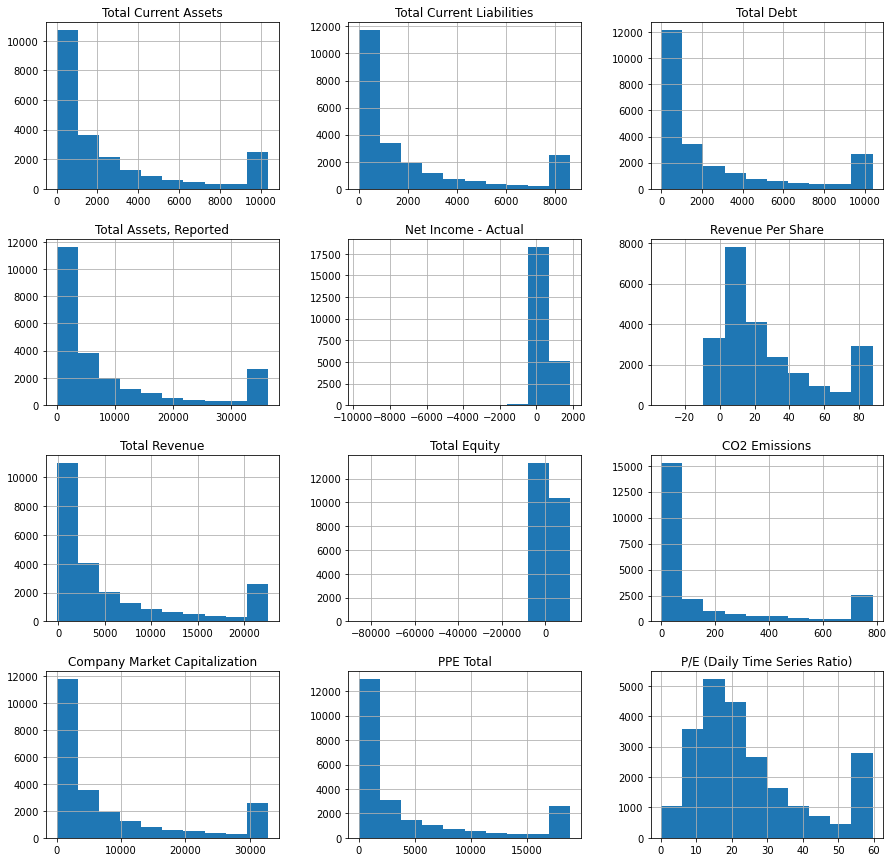

In [98]:
df_firm[columns].hist( figsize=(15,15))

plt.show()

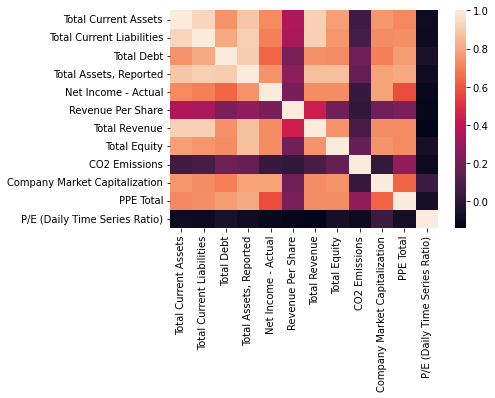

<Figure size 1440x1440 with 0 Axes>

In [99]:
cormat = df_firm[columns].corr()
sns.heatmap(cormat)
plt.figure(figsize=(20,20))
plt.show()